The `results-summary.txt` contains, for each alternative model, the name and the overal badness from PyTEK

In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('results-summary.txt', delimiter='\s+',names=['model','error'])
data

,model,error
0,master.0.0,107.766690
1,master.1000.1,107.758887
2,master.1001.1,107.764022
3,master.1001.2,107.749616
4,master.1002.1,107.767175
5,master.1002.2,107.766386
6,master.1003.1,107.756203
7,master.1003.2,107.764217
8,master.1005.1,107.770179
9,master.1005.2,107.766997


In [3]:
sns.set_style('ticks')

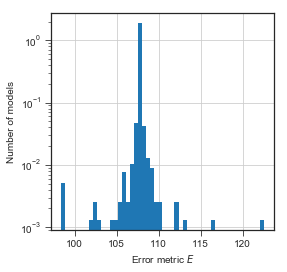

In [4]:

data.error.hist(bins=50, log=True, figsize=(4,4), normed=True)
plt.xlabel("Error metric $E$")
plt.ylabel("Number of models")

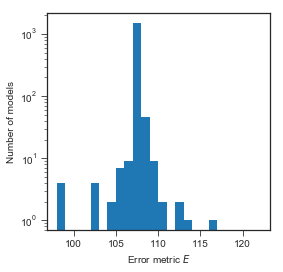

In [5]:
e = data['error']
plt.figure(figsize=(4,4))
plt.hist(e, bins=range(int(min(e)),int(max(e))+1), log=True, normed=False ) 
plt.xlabel("Error metric $E$")
plt.ylabel("Number of models")

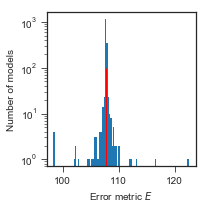

In [6]:
e = data['error']
plt.figure(figsize=(3,3))
plt.hist(e, bins=100, log=True, normed=False) 
plt.xlabel("Error metric $E$")
plt.ylabel("Number of models")
plt.vlines(e[0],0,100, color='red', linewidth=1)
min(e), max(e)
plt.tight_layout()
plt.savefig('histogram-log.pdf')

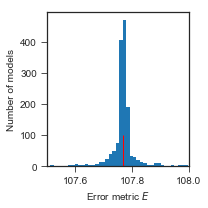

In [7]:
e = data['error']
plt.figure(figsize=(3,3))
plt.hist(e, bins=2000, log=False, normed=False) 
plt.xlim(107.5,108)
plt.xlabel("Error metric $E$")
plt.ylabel("Number of models")
plt.vlines(e[0],0,100, color='red', linewidth=1)
plt.tight_layout()
plt.savefig('histogram-linear.pdf')

In [8]:
data['deltaE'] = data['error'] - e[0]
data

,model,error,deltaE
0,master.0.0,107.766690,0.000000
1,master.1000.1,107.758887,-0.007803
2,master.1001.1,107.764022,-0.002668
3,master.1001.2,107.749616,-0.017074
4,master.1002.1,107.767175,0.000485
5,master.1002.2,107.766386,-0.000304
6,master.1003.1,107.756203,-0.010487
7,master.1003.2,107.764217,-0.002473
8,master.1005.1,107.770179,0.003489
9,master.1005.2,107.766997,0.000307


In [28]:
data['absDeltaE'] = data['deltaE'].map(abs)
sorted_abs  = data.sort_values(by='absDeltaE', ascending=False)
sorted_abs.head(20)

,model,error,deltaE,absDeltaE
1401,master.thermo.190.1,122.513519,14.746829,14.746829
467,master.293.2,98.358989,-9.407701,9.407701
305,master.187.2,98.419896,-9.346794,9.346794
860,master.59.1,98.422319,-9.344371,9.344371
1432,master.thermo.224.1,98.429509,-9.337181,9.337181
1402,master.thermo.190.2,116.494232,8.727542,8.727542
304,master.187.1,102.221870,-5.544820,5.544820
184,master.1440.1,102.276196,-5.490494,5.490494
884,master.61.1,102.319485,-5.447205,5.447205
462,master.291.1,113.119219,5.352529,5.352529


In [50]:
line = u"""
% {subs:30s} 
{kind:17s} & {number:5s} & {alternate} & {error:.3f} & {deltaE:+.3f} \\\\"""
for i,row in sorted_abs.iloc[:20].iterrows():
    subs = row.model
    deltaE = row.deltaE
    error = row.error
    n = row.model.split('.')[1]
    sub = subs.replace('master.thermo','Thermochemistry').replace('master','Kinetics')
    kind, number, alternate  = sub.split('.')
    print line.format(**locals())
    


% master.thermo.190.1            
Thermochemistry   & 190   & 1 & 122.514 & +14.747 \\

% master.293.2                   
Kinetics          & 293   & 2 & 98.359 & -9.408 \\

% master.187.2                   
Kinetics          & 187   & 2 & 98.420 & -9.347 \\

% master.59.1                    
Kinetics          & 59    & 1 & 98.422 & -9.344 \\

% master.thermo.224.1            
Thermochemistry   & 224   & 1 & 98.430 & -9.337 \\

% master.thermo.190.2            
Thermochemistry   & 190   & 2 & 116.494 & +8.728 \\

% master.187.1                   
Kinetics          & 187   & 1 & 102.222 & -5.545 \\

% master.1440.1                  
Kinetics          & 1440  & 1 & 102.276 & -5.490 \\

% master.61.1                    
Kinetics          & 61    & 1 & 102.319 & -5.447 \\

% master.291.1                   
Kinetics          & 291   & 1 & 113.119 & +5.353 \\

% master.180.1                   
Kinetics          & 180   & 1 & 102.707 & -5.059 \\

% master.272.1                   
Kinetics   

In [9]:
sorted = data.sort_values(by='error')
sorted

,model,error,deltaE
467,master.293.2,98.358989,-9.407701
305,master.187.2,98.419896,-9.346794
860,master.59.1,98.422319,-9.344371
1432,master.thermo.224.1,98.429509,-9.337181
304,master.187.1,102.221870,-5.544820
184,master.1440.1,102.276196,-5.490494
884,master.61.1,102.319485,-5.447205
295,master.180.1,102.707200,-5.059490
617,master.391.2,104.632262,-3.134428
1586,master.thermo.90.1,104.743739,-3.022951


In [10]:
data



,model,error,deltaE
0,master.0.0,107.766690,0.000000
1,master.1000.1,107.758887,-0.007803
2,master.1001.1,107.764022,-0.002668
3,master.1001.2,107.749616,-0.017074
4,master.1002.1,107.767175,0.000485
5,master.1002.2,107.766386,-0.000304
6,master.1003.1,107.756203,-0.010487
7,master.1003.2,107.764217,-0.002473
8,master.1005.1,107.770179,0.003489
9,master.1005.2,107.766997,0.000307


In [11]:
kinetics = sorted[sorted.model.str.contains('thermo')==False]

In [12]:
kinetics.head(13), kinetics.tail(10)


(             model       error    deltaE
 467   master.293.2   98.358989 -9.407701
 305   master.187.2   98.419896 -9.346794
 860    master.59.1   98.422319 -9.344371
 304   master.187.1  102.221870 -5.544820
 184  master.1440.1  102.276196 -5.490494
 884    master.61.1  102.319485 -5.447205
 295   master.180.1  102.707200 -5.059490
 617   master.391.2  104.632262 -3.134428
 186  master.1441.1  105.342846 -2.423844
 616   master.391.1  105.461370 -2.305320
 310   master.189.2  105.699928 -2.066762
 140  master.1267.1  105.714178 -2.052512
 187  master.1441.2  105.767447 -1.999243,
             model       error    deltaE
 765  master.533.2  108.960638  1.193948
 914  master.635.1  109.027901  1.261211
 500  master.321.1  109.213622  1.446932
 203  master.145.2  109.245812  1.479122
 501  master.321.2  109.582664  1.815974
 769  master.535.2  110.007504  2.240814
 768  master.535.1  110.084913  2.318223
 444  master.272.2  112.084932  4.318242
 443  master.272.1  112.314943  4.548253
 

In [13]:
line = u"""
{n} & Orig. & \\num{{ 1e1 }} & 0.0 &  &
{{\\small  }}
\\\\ %% Substitution: {subs}
  & Repl. & \\num{{ 1e1 }} &  0.0 &  & 
{{\\small  }}&
{deltaE:.3f}
  \\\\
\\midrule
"""
for i,row in kinetics.iloc[:12:+1].iterrows():
    subs = row.model
    deltaE = row.deltaE
    n = row.model.split('.')[1]
    print line.format(**locals())
    
    
for i,row in kinetics.iloc[:-8:-1].iterrows():
    subs = row.model
    deltaE = row.deltaE
    n = row.model.split('.')[1]
    print line.format(**locals())
    
    


293 & Orig. & \num{ 1e1 } & 0.0 &  &
{\small  }
\\ %% Substitution: master.293.2
  & Repl. & \num{ 1e1 } &  0.0 &  & 
{\small  }&
-9.408
  \\
\midrule


187 & Orig. & \num{ 1e1 } & 0.0 &  &
{\small  }
\\ %% Substitution: master.187.2
  & Repl. & \num{ 1e1 } &  0.0 &  & 
{\small  }&
-9.347
  \\
\midrule


59 & Orig. & \num{ 1e1 } & 0.0 &  &
{\small  }
\\ %% Substitution: master.59.1
  & Repl. & \num{ 1e1 } &  0.0 &  & 
{\small  }&
-9.344
  \\
\midrule


187 & Orig. & \num{ 1e1 } & 0.0 &  &
{\small  }
\\ %% Substitution: master.187.1
  & Repl. & \num{ 1e1 } &  0.0 &  & 
{\small  }&
-5.545
  \\
\midrule


1440 & Orig. & \num{ 1e1 } & 0.0 &  &
{\small  }
\\ %% Substitution: master.1440.1
  & Repl. & \num{ 1e1 } &  0.0 &  & 
{\small  }&
-5.490
  \\
\midrule


61 & Orig. & \num{ 1e1 } & 0.0 &  &
{\small  }
\\ %% Substitution: master.61.1
  & Repl. & \num{ 1e1 } &  0.0 &  & 
{\small  }&
-5.447
  \\
\midrule


180 & Orig. & \num{ 1e1 } & 0.0 &  &
{\small  }
\\ %% Substitution: master.180.1
  

In [14]:
thermo = sorted[sorted.model.str.contains('thermo')==True]
thermo

,model,error,deltaE
1432,master.thermo.224.1,98.429509,-9.337181
1586,master.thermo.90.1,104.743739,-3.022951
1484,master.thermo.283.1,106.119884,-1.646806
1588,master.thermo.91.1,106.959507,-0.807183
1556,master.thermo.71.2,107.096770,-0.669920
1487,master.thermo.29.1,107.110147,-0.656543
1469,master.thermo.26.1,107.180727,-0.585963
1555,master.thermo.71.1,107.233393,-0.533297
1470,master.thermo.26.2,107.241226,-0.525464
1507,master.thermo.40.2,107.277559,-0.489131


In [15]:
line = u"""
%% Substitution: {subs}
{n} & 
\ce{{  }}
&
ASSEENIN
& 
{deltaE:+.3f}
\\\\
"""
for i,row in thermo.iloc[:2:+1].iterrows():
    subs = row.model
    deltaE = row.deltaE
    n = row.model.split('.')[2]
    print line.format(**locals())
    
    
for i,row in thermo.iloc[:-5:-1].iterrows():
    subs = row.model
    deltaE = row.deltaE
    n = row.model.split('.')[2]
    print line.format(**locals())


%% Substitution: master.thermo.224.1
224 & 
\ce{  }
&
ASSEENIN
& 
-9.337
\\


%% Substitution: master.thermo.90.1
90 & 
\ce{  }
&
ASSEENIN
& 
-3.023
\\


%% Substitution: master.thermo.190.1
190 & 
\ce{  }
&
ASSEENIN
& 
+14.747
\\


%% Substitution: master.thermo.190.2
190 & 
\ce{  }
&
ASSEENIN
& 
+8.728
\\


%% Substitution: master.thermo.107.1
107 & 
\ce{  }
&
ASSEENIN
& 
+1.892
\\


%% Substitution: master.thermo.96.1
96 & 
\ce{  }
&
ASSEENIN
& 
+1.636
\\



In [16]:
list(kinetics.iloc[:12:+1].model)

['master.293.2',
 'master.187.2',
 'master.59.1',
 'master.187.1',
 'master.1440.1',
 'master.61.1',
 'master.180.1',
 'master.391.2',
 'master.1441.1',
 'master.391.1',
 'master.189.2',
 'master.1267.1']

In [17]:
list(kinetics.iloc[:-8:-1].model)

['master.291.1',
 'master.272.1',
 'master.272.2',
 'master.535.1',
 'master.535.2',
 'master.321.2',
 'master.145.2']

In [18]:
kinetics.iloc[:-8:-1]

,model,error,deltaE
462,master.291.1,113.119219,5.352529
443,master.272.1,112.314943,4.548253
444,master.272.2,112.084932,4.318242
768,master.535.1,110.084913,2.318223
769,master.535.2,110.007504,2.240814
501,master.321.2,109.582664,1.815974
203,master.145.2,109.245812,1.479122


In [19]:

thermo = sorted[sorted.model.str.contains('thermo')==True]
thermo

,model,error,deltaE
1432,master.thermo.224.1,98.429509,-9.337181
1586,master.thermo.90.1,104.743739,-3.022951
1484,master.thermo.283.1,106.119884,-1.646806
1588,master.thermo.91.1,106.959507,-0.807183
1556,master.thermo.71.2,107.096770,-0.669920
1487,master.thermo.29.1,107.110147,-0.656543
1469,master.thermo.26.1,107.180727,-0.585963
1555,master.thermo.71.1,107.233393,-0.533297
1470,master.thermo.26.2,107.241226,-0.525464
1507,master.thermo.40.2,107.277559,-0.489131


/Users/rwest/anaconda/envs/rmg6/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


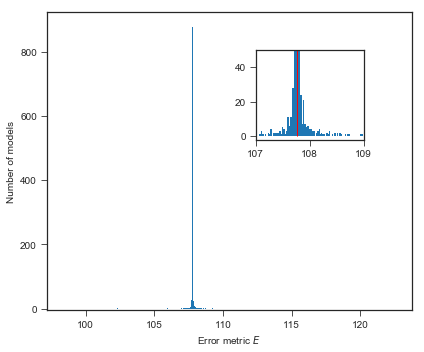

In [20]:
e = data['error']
plt.figure(figsize=(6,5))
# range(int(min(e)),int(max(e))+1)
n, bins, patches = plt.hist(e, bins=1000, log=False, normed=False ) 
plt.xlabel("Error metric $E$")
plt.ylabel("Number of models")
plt.ylim(-5,)

# this is an inset axes over the main axes
a = plt.axes([.6, .6, .25, .25], facecolor='w')
n, bins, patches = plt.hist(e, bins=1000, log=False, normed=False ) 
plt.vlines(e[0],0,50, color='red', linewidth=1)
plt.ylim(-2,50)
plt.xlim(107,109)
#plt.xticks([])
#plt.yticks([])


plt.tight_layout()
plt.savefig("big-histogram.pdf")
#plt.vlines(e[0],0,25, color='red', linewidth=1)

In [21]:
plt.figure(figsize=(2,2))
# range(int(min(e)),int(max(e))+1)
plt.bar(a[1][1:],a[0])
plt.ylim(-5,50)
plt.xlim(107,109)
a[0]

TypeError: 'Axes' object does not support indexing

In [ ]:
e = data['error']
plt.figure(figsize=(10,10))
# range(int(min(e)),int(max(e))+1)
a = plt.hist(e, bins=2000, log=False, normed=False) 

plt.xlim(107.7,107.8)


In [ ]:
i = np.argmax(a[0])
a[1][i], a[1][i+1]
e.mi
np.arange()

In [ ]:
min(e), max(e)

In [ ]:
bins = np.arange(98.35,122.52, 0.01)

In [ ]:
e = data['error']
plt.figure(figsize=(20,10))
# range(int(min(e)),int(max(e))+1)
a = plt.hist(e, bins=bins, log=True, normed=False ) 
plt.xlabel("Error metric $E$")
plt.ylabel("Probability density")

In [ ]:
delta = (e-e[0])
delta[delta!=0].abs().min()

In [ ]:
delta[delta==0] = 1e-7


In [ ]:
delta[delta>0].map(np.log10).hist(bins=range(-7,2))

In [ ]:
plt.figure(figsize=(4,4))
plt.hist(delta[delta>0].map(np.log10), bins=range(-7,2))
plt.xlabel('$\log_{10}(\Delta E)$ for $\Delta E > 0$')
plt.ylabel('Number of models')
plt.tight_layout()
plt.savefig("histogram-logx.pdf")

In [ ]:
plt.figure(figsize=(4,4))
plt.hist(delta.abs().map(np.log10), bins=range(-7,2))
plt.xlabel('$\log_{10}( \| \Delta E \|)$')
plt.ylabel('Number of models')
plt.tight_layout()
plt.savefig("histogram-logAbsDeltaE.pdf")

In [ ]:
(delta[delta<0]*-1).map(np.log10).hist(bins=range(-7,2))

In [ ]:
delta.hist(bins=100, log=True)

In [ ]:
e = data['error']
plt.figure(figsize=(7,6))
# range(int(min(e)),int(max(e))+1)
n, bins, patches = plt.hist(e, bins=1000, log=False, normed=False ) 
plt.xlabel("Error metric $E$")
plt.ylabel("Number of models")
plt.ylim(-5,)

# this is an inset axes over the main axes
a = plt.axes([.6, .6, .3, .3], facecolor='w')
plt.hist(e, bins=1000, log=True, normed=False ) 
plt.vlines(e[0],0,50, color='red', linewidth=1)
plt.xlim(107,109)
plt.xlabel('$E$')
plt.ylabel('Number of models')

a = plt.axes([.6, .2, .3, .3], facecolor='w')
plt.hist(delta.abs().map(np.log10), bins=range(-7,2))
plt.xlabel('$\log_{10}( \| \Delta E \|)$')
plt.ylabel('Number of models')
#
#plt.ylim(-2,50)
#plt.xlim(107,109)
#plt.xticks([])
#plt.yticks([])

plt.tight_layout()
plt.savefig("big-histogram.pdf")
#plt.vlines(e[0],0,25, color='red', linewidth=1)

In [ ]:
# this is an inset axes over the main axes
plt.figure(figsize=(3,3))
plt.hist(e, bins=1000, log=True, normed=False )
plt.xlim(107,109)
plt.xlabel('$E$')
plt.ylabel('Number of models')

In [ ]:
x=0.01
print "percentage of substitutions changing the error by less than",x
100.* sum(delta<x) / (len(delta)-1)

In [ ]:
e[0]